#### Teoría de Circuitos II

# Trabajo semanal 5
#### 


#### Ejercicio 1
Se debe diseñar un filtro pasa-altos, que presente máxima planicidad en la banda de paso (frecuencia de corte = 300 Hz) y un cero de transmisión en 100 Hz. El prototipo pasabajos normalizado presenta la siguiente respuesta:

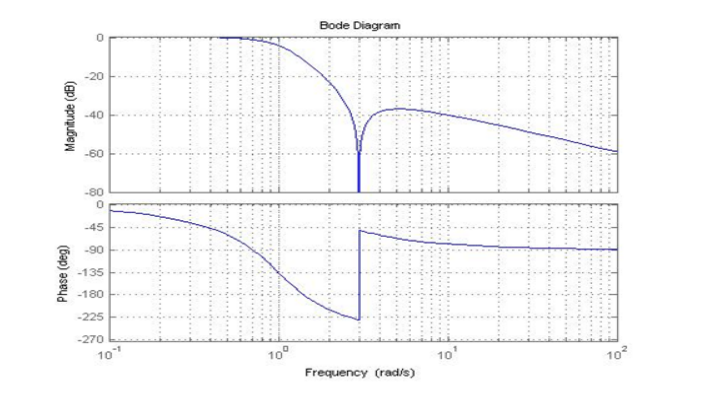

a) Determine la expresión de H(s) del filtro pasa-altos normalizado                    

b) Realizar el diagrama de polos y ceros de H(s)                                             

c) Sintetice el circuito del filtro pedido. Se utilizará para la estructura de segundo orden el siguiente circuito:

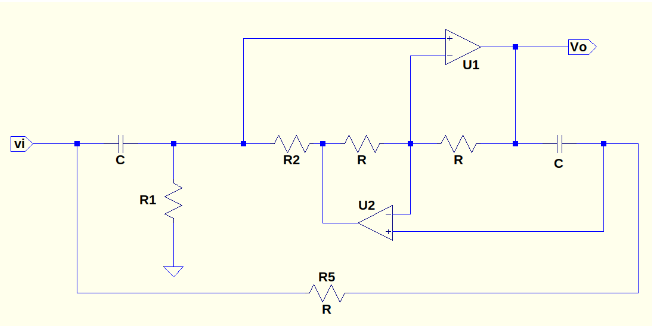

d) Compare la estructura sugerida y discuta las similitudes y diferencias con la red propuesta por Schaumann:

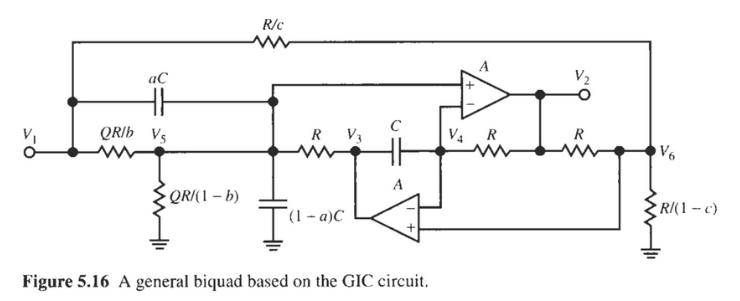

Busco el orden y las raices para asi armar el prototipo del siltro pasabajos ,gracias al grafico se sabe que se busca un filtro pasabajos  snoch con la siguiente forma 

\begin{equation}
T(s) =K \frac{S^2 + Wn^2}{S^2 + \frac{Wp}{Qp}S +Wp^2}
\end{equation}



In [1]:
import scipy
import scipy.signal as signal
from scipy import signal as sig
from splane import analyze_sys, pretty_print_bicuad_omegayq
import math as m

Alfa_min = 20
Alfa_max = 1

## Calculo el epsilon y con el el N
Epsilon = m.sqrt(m.pow(10 , 0.1 * Alfa_max) - 1)

Ws_LP=3

# Maxima planicidad
N = (m.log10( (m.pow(10,Alfa_min * 0.1) - 1) / (m.pow(10,Alfa_max * 0.1) - 1) ) ) / ( 2 * m.log10(Ws_LP))


N=m.ceil(N)
print(f'Epsilon = {Epsilon},N_MP = {N}')

import numpy as np
Raices=np.roots([-(m.pow(10 , 0.1 * Alfa_max)-1),0,0,0,0,0,1])

Raices_limpias=Raices[np.real(Raices)<0]


print(f'Raices = {Raices_limpias}') 

Wo2=Raices[1]*Raices[0]


Epsilon = 0.5088471399095875,N_MP = 3
Raices = [-1.25257639+0.j         -0.62628819+1.08476297j -0.62628819-1.08476297j]


Se obtuvo un filtro de orden 3 y tres polos , dos conjugados y uno real puro, de forma que :

Siendo por requisito ceros en 100Hz

\begin{equation}
T(s) =K \frac{S^2 + Wo^2}{S^2 - S(2*Real(P2)) +P2*P3} * \frac{1}{S-P1}
\end{equation}

Normalizo para graficar mejor 

\begin{equation}
T(s) =K \frac{S^2 + 1}{S^2 - S(2*\frac{Real(P2)}{Wo}) +\frac{P2*P3}{Wo^2}} * \frac{1}{S+\frac{P1}{Wo}}
\end{equation}

Una vez normalizado para desfasar, hago modificaciones en el denominador modificando el Wz

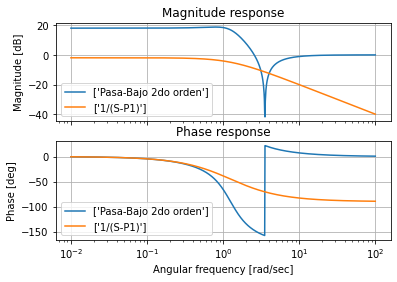

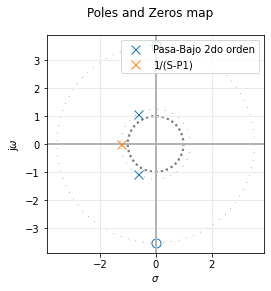

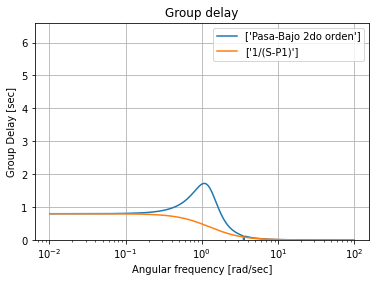

In [2]:
P1=-1.25257639
P2=-0.62628819+1.08476297j
P3=-0.62628819-1.08476297j

Rp2=-0.62628819

A=P1-(2*Rp2)
B=(P2*P3) - 2*P1*Rp2
C=P1*P2*P3
k=1

Wz=m.sqrt(125.25)

num=[k*1,0.0001,(Wz**2)/10]
den=[1,-2*Rp2,P2*P3]


mi_sos_A = sig.TransferFunction(num,den)
analyze_sys(mi_sos_A, 'Pasa-Bajo 2do orden')

num=[1]
den=[1,-P1]


mi_sos_A = sig.TransferFunction(num,den)
analyze_sys(mi_sos_A, '1/(S-P1)')


Una vez obtenido la H(s)lp aplico el nucleo de la transformada para obtener el H(s) del pasa-altos

A= (P1 - 2Real(P2))/100

B= (P2^2 - 2Real(P2)*P1)/100^2

C= P1*P2*P3/100^3


\begin{equation}
T(s) =K \frac{S^2 + (1.2525)^2}{S^2 - S(2*Real(P2)) +P2*P3} * \frac{1}{S-P1}
\end{equation}


Finalmente, con K= 1/C:
\begin{equation}
T(s) = \frac{1}{C}\frac{S^3 + S}{S^3 + S^2 * (B/C) + S * (A/C) + 1/C}
\end{equation}

In [3]:
k=1/C_n

num=[1,0,k*1,0]
den=[1,(B_n/C_n),(A_n/C_n),1/C_n]


mi_sos_A = sig.TransferFunction(num,den)
analyze_sys(mi_sos_A, 'Pasa-Altos')

NameError: name 'C_n' is not defined

In [35]:
m.sqrt(1.5689475980166974)

1.252576384104657